<h2>ALY6015_SpringA2020_Pragati_Koladiya_Assignment_3</h2>

<p> <b>Week: </b>3</p>
<p> <b>Author:</b> Pragati Koladiya </p> 
<p> <b>Tittle:</b> Assignment 3 </p>


<h1>Part 3 - Lasso Regression and Regularization</h1>


In [210]:
import plotly.figure_factory as ff
from imblearn.over_sampling import SMOTE

import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from matplotlib.ticker import PercentFormatter

import numpy as np
import os
import pandas as pd
from pylab import rcParams
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import random
from sklearn.metrics import roc_auc_score,make_scorer,classification_report,roc_curve,auc
#from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import r2_score

import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC


from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

%matplotlib inline

<h3>Acquire and load the data</h3>

In [211]:
#read data from google sheets 
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vRKlXq7IH3RmahATAHn8FRcKf8sd-t5AhrL6Pj5ZIkqbMZ8qSBAj_sotsDnxse0rzbVcGL2q2tlJpJp/pub?gid=604518783&single=true&output=csv"
df = pd.read_csv(data_path)

In [212]:
df.shape

(243, 20)

In [213]:
df.head()

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague
0,875000,457,101,14,42,63,22,17,6521,1767,281,1003,977,619,A,W,389,39,4,A
1,1300000,441,118,28,84,86,68,8,2723,750,126,433,420,309,A,E,190,2,2,A
2,940000,593,152,23,69,75,53,6,2765,686,133,369,384,321,A,W,315,10,6,A
3,70000,312,68,2,32,22,24,1,312,68,2,32,22,24,A,E,86,150,15,A
4,815000,526,146,13,71,70,84,6,2648,715,77,352,342,289,N,W,303,9,9,N


In [214]:
df.tail()

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague
238,0,209,59,6,20,37,27,4,884,209,14,66,106,92,N,E,415,35,3,N
239,0,225,61,5,32,26,26,11,1568,408,25,202,185,257,A,W,132,9,0,A
240,0,551,160,23,86,90,87,5,2235,602,75,278,328,273,A,W,1224,115,11,A
241,0,200,57,6,23,14,14,9,2516,684,46,371,230,195,N,W,69,1,1,N
242,0,346,98,5,31,53,30,16,5913,1615,235,784,901,560,A,E,0,0,0,A


<h1>Data Exploration</h1>

- <p>Checking for missing values</p>

In [215]:
df.isnull().sum()

Salary                  0
count_at_bats           0
count_hits              0
count_home_runs         0
count_runs              0
RBI                     0
count_walks             0
years_experience        0
cumulative_at_bats      0
cumulative_hits         0
cumulative_home_runs    0
cumulative_runs         0
cumulative_RBI          0
cumulative_walks        0
League                  0
Division                0
PutOuts                 0
Assists                 0
Errors                  0
NewLeague               0
dtype: int64

=> <i>Null values not found</i>

In [216]:
df.dtypes

Salary                   int64
count_at_bats            int64
count_hits               int64
count_home_runs          int64
count_runs               int64
RBI                      int64
count_walks              int64
years_experience         int64
cumulative_at_bats       int64
cumulative_hits          int64
cumulative_home_runs     int64
cumulative_runs          int64
cumulative_RBI           int64
cumulative_walks         int64
League                  object
Division                object
PutOuts                  int64
Assists                  int64
Errors                   int64
NewLeague               object
dtype: object

- <p>Describing quantitative variable</p>

In [217]:
df['Salary'].unique()

array([ 875000, 1300000,  940000,   70000,  815000,  350000, 1008000,
        125000,  400000,  850000,  385000,  750000,  210000,  250000,
        450000,  300000,  105000,  630000,   90000,  135000,  475000,
       1600000,  417000,  640000,   75000,  342000,  777000,  765000,
       1926000, 1150000, 1200000, 1260000,  225000,  200000,  325000,
        775000,  340000,  650000,  110000,  700000,  657000,  900000,
        425000,  535000,  580000,  160000,  740000,  165000,  287000,
         92000, 1450000,  733000,  203000,  155000,  550000,  190000,
        260000, 1238000,  773000,  145000,  150000,  100000,  670000,
        530000,  175000,  420000, 1050000, 1183000,  663000,  500000,
        525000, 1220000,  275000,  320000, 1500000,   80000,  430000,
        625000,  613000,  800000,  738000,  600000, 1800000,   68000,
        920000,  675000, 1000000,  780000,  215000,  140000,  488000,
       1310000,  240000,  278000,  950000,  120000,  180000,  708000,
        788000, 1100

In [218]:
df['League'].unique()

array(['A', 'N'], dtype=object)

In [219]:
df['Division'].unique()

array(['W', 'E'], dtype=object)

In [220]:
df['NewLeague'].unique()

array(['A', 'N'], dtype=object)

In [221]:
df.describe()

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,PutOuts,Assists,Errors
count,2.430000e+02,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,3.964856e+05,377.621399,99.975309,10.666667,50.123457,47.362140,38.115226,7.473251,2654.497942,717.703704,71.831276,362.061728,332.069959,263.711934,284.263374,102.781893,7.629630
std,4.205241e+05,151.221516,45.997478,8.449656,25.186109,25.642821,21.239171,5.018386,2344.518332,657.431235,88.616130,337.841166,333.997166,277.955388,275.126756,134.263086,6.244557
min,0.000000e+00,16.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000e+04,255.500000,64.000000,4.000000,31.000000,29.000000,22.000000,4.000000,826.500000,209.500000,14.000000,100.500000,91.500000,66.500000,113.500000,6.500000,3.000000
50%,2.500000e+05,360.000000,95.000000,8.000000,48.000000,44.000000,34.000000,6.000000,1931.000000,510.000000,39.000000,258.000000,230.000000,174.000000,211.000000,33.000000,6.000000
75%,6.665000e+05,511.000000,136.000000,16.000000,68.500000,63.500000,52.000000,11.000000,3890.500000,1037.500000,93.000000,523.500000,424.500000,329.500000,322.500000,151.500000,10.000000
max,1.975000e+06,687.000000,238.000000,40.000000,117.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000


- <i>salary columns has value 0 which is not helpful for further analysis so we will remove it</i>

In [222]:
df= df[~(df==0).any(axis=1)]
df.shape


(166, 20)

In [223]:
df.tail()

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague
179,517000,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,A
180,250000,257,66,5,31,26,32,14,3910,979,33,518,324,382,N,W,87,166,14,A
181,300000,204,49,6,23,25,12,7,1309,308,27,126,132,66,A,W,419,46,5,A
182,700000,283,77,14,45,47,26,16,6840,1910,259,915,1067,546,A,W,144,6,5,A
183,1350000,627,177,25,98,81,70,6,3210,927,133,529,472,313,A,E,240,482,13,A


<h3>Lable encoding</h3>

In [224]:
#encoding of categorical data using replace() function
replace_map = {'League': {'A': 0, 'N': 1}}
df.replace(replace_map, inplace=True)

In [225]:
#encoding of categorical data using replace() function
replace_map = {'Division': {'W': 2, 'E':3}}
df.replace(replace_map, inplace=True)

In [226]:
#encoding of categorical data using replace() function
replace_map = {'NewLeague': {'A': 4, 'N': 5}}
df.replace(replace_map, inplace=True)

In [227]:
df_s.describe()

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,12.839859,418.246988,112.331325,11.981928,56.957831,52.819277,41.463855,7.036145,2573.493976,697.692771,68.024096,351.656627,318.042169,249.301205,0.463855,2.518072,308.313253,124.644578,8.807229,4.427711
std,0.900697,141.945292,44.291238,8.335738,24.304221,25.299728,20.765251,4.569851,2075.430887,579.576864,75.439074,296.878380,293.059108,247.476683,0.500201,0.501185,273.885950,147.097907,6.430906,0.496244
min,11.127263,19.000000,4.000000,1.000000,2.000000,3.000000,1.000000,1.000000,19.000000,4.000000,1.000000,2.000000,3.000000,1.000000,0.000000,2.000000,37.000000,1.000000,1.000000,4.000000
25%,12.134778,309.500000,76.250000,5.000000,37.000000,34.250000,26.000000,4.000000,926.250000,227.750000,16.000000,117.250000,97.500000,72.750000,0.000000,2.000000,142.250000,9.000000,4.000000,4.000000
50%,12.994272,425.000000,113.000000,10.000000,55.000000,48.000000,38.000000,6.000000,1948.500000,528.500000,40.500000,269.000000,251.500000,176.500000,0.000000,3.000000,232.000000,53.500000,7.000000,4.000000
75%,13.527828,538.500000,146.750000,17.750000,76.000000,72.750000,53.000000,10.000000,3719.250000,969.500000,92.750000,487.500000,415.750000,312.000000,1.000000,3.000000,325.000000,217.500000,13.000000,5.000000
max,14.496079,687.000000,238.000000,40.000000,117.000000,121.000000,105.000000,20.000000,8759.000000,2583.000000,384.000000,1175.000000,1299.000000,1380.000000,1.000000,3.000000,1377.000000,492.000000,32.000000,5.000000


<h2>Feature Selection</h2>

- <i>It helps to identify the import features from the dataset by providing scores</i>

In [228]:
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range

X =df.iloc[:,df.columns != 'Salary' ]
y =df.Salary
X.head()

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Baseball','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features


                Baseball          Score
7     cumulative_at_bats  232052.265501
8        cumulative_hits   68063.385991
11        cumulative_RBI   37266.607195
10       cumulative_runs   35191.768650
12      cumulative_walks   34530.045677
15               PutOuts   32539.192405
16               Assists   19815.597653
9   cumulative_home_runs   10768.871756
0          count_at_bats    6200.051640
1             count_hits    2272.541310
4                    RBI    1471.423867
5            count_walks    1369.129793
3             count_runs    1289.044072
2        count_home_runs     700.170789
17                Errors     523.164706
6       years_experience     382.453739
13                League      58.207359
14              Division      11.726874
18             NewLeague       6.304807


- <i>Graphical representaion of feature importance for predicting attrition</i>

[0.05458761 0.05537093 0.05003935 0.05150871 0.04649889 0.05815425
 0.0498148  0.05800682 0.06082685 0.05747601 0.06122171 0.07107587
 0.05544    0.02940998 0.04118897 0.04850429 0.05415199 0.07178265
 0.0249403 ]


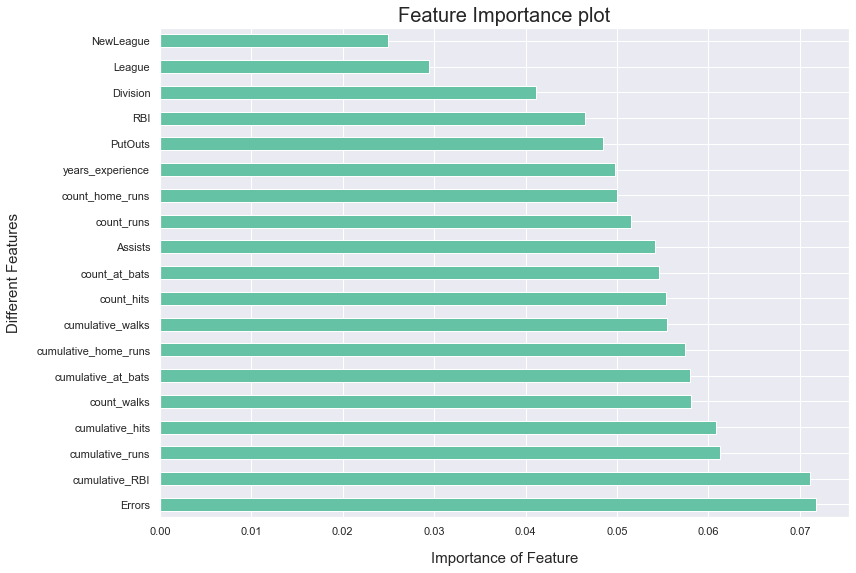

In [182]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')
sns.set(palette='Set2')


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.xlabel("Importance of Feature", labelpad = 15, fontsize=15)
plt.ylabel("Different Features", labelpad = 15, fontsize=15);
plt.title("Feature Importance plot", fontsize=20)

plt.show()

- <i>Heat map to represent corelation between selected features</i>

Text(0.5, 2, 'Heatmap to observe corelation between selected features and transaction ')

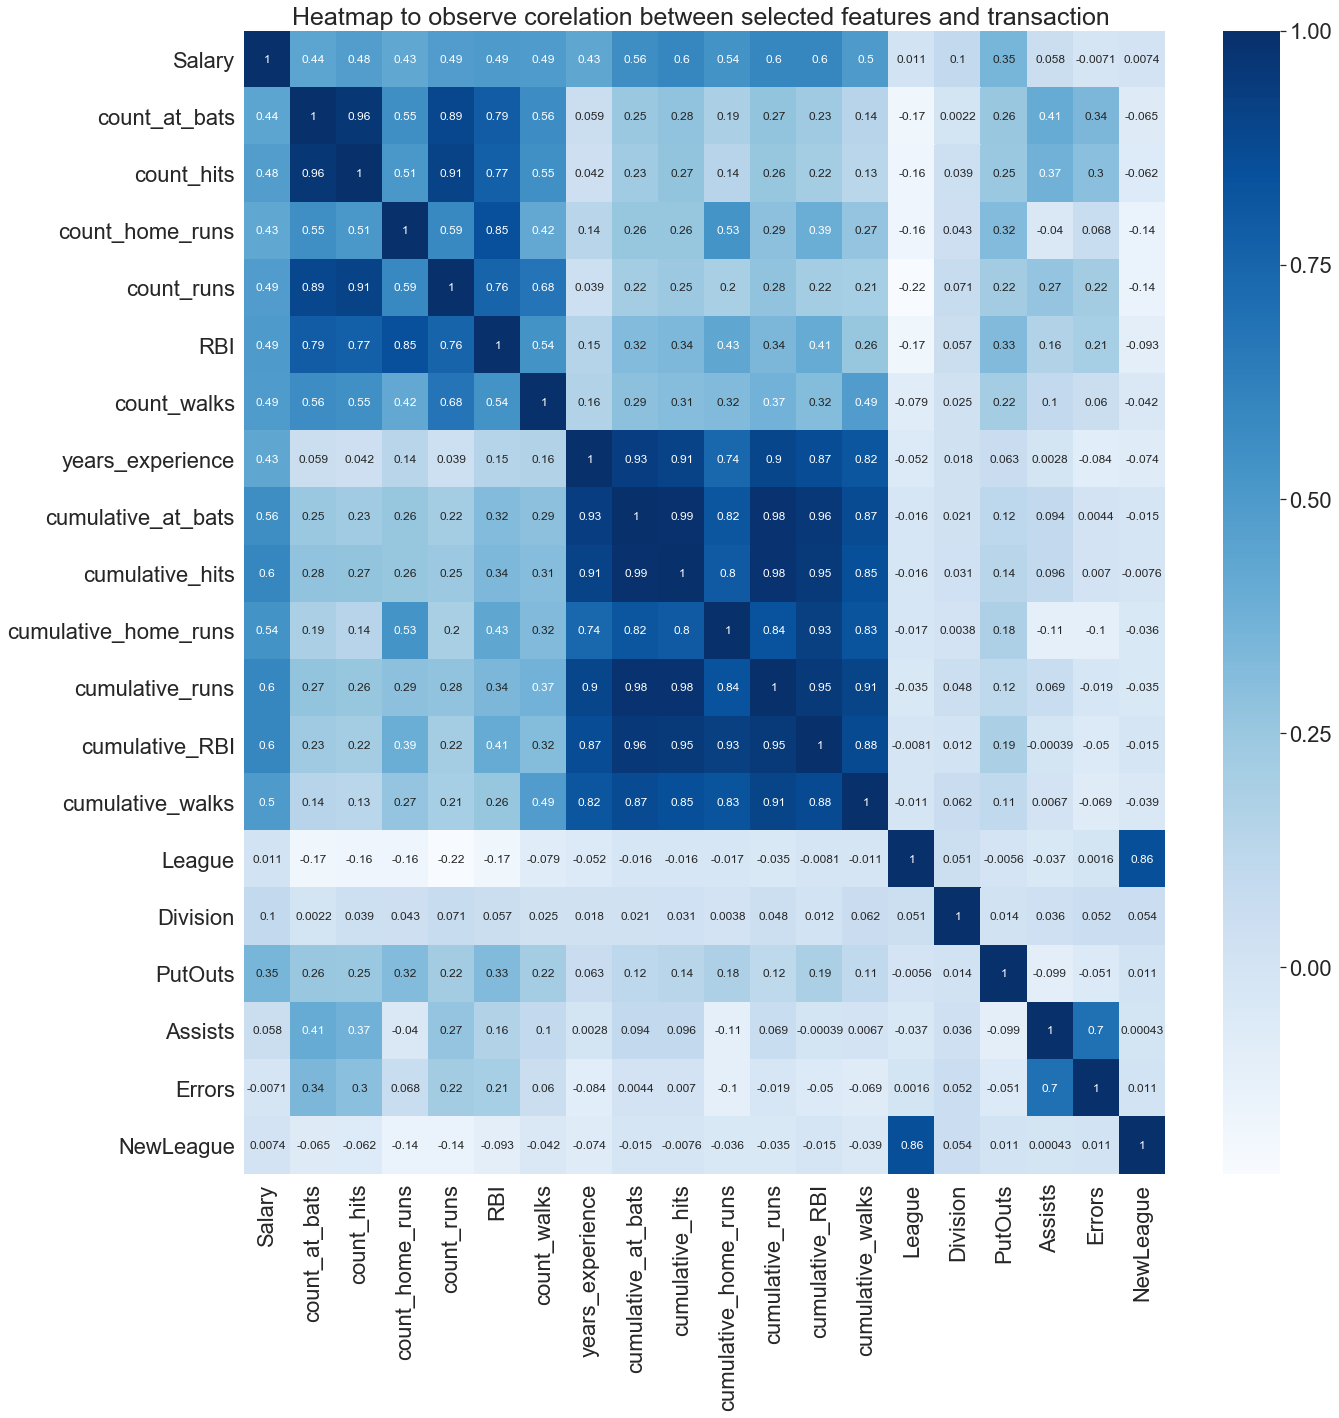

In [240]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#matplotlib.rc('xtick', labelsize=15) 
#matplotlib.rc('ytick', labelsize=15) 

sns.set(font_scale=2)
#plot heat map

ax=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues", annot_kws={"size":12})

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Heatmap to observe corelation between selected features and transaction ', y=2, fontsize=25)
#plt.title('Correlation plot',fontsize=17)

<h1>Graphs</h1>

Text(0.5, 1.0, 'Density plot for Salary')

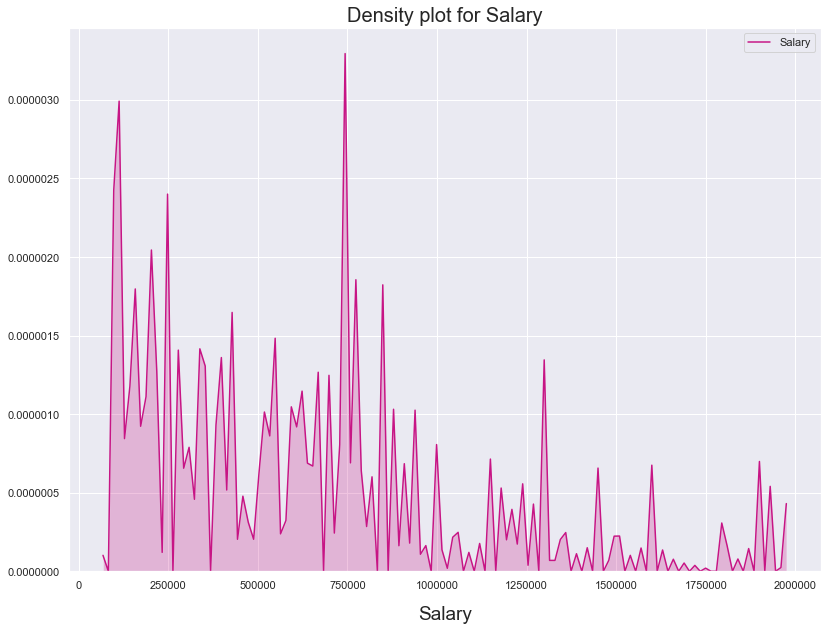

In [183]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.set(style='whitegrid')
sns.set(palette='Set2')

plt.xlabel("Salary", labelpad = 15, fontsize=19)

sns.kdeplot(df['Salary'], shade=True, bw=.5, color="mediumvioletred")

plt.title("Density plot for Salary", fontsize=20)


Text(0.5, 1.0, 'Scatter plot for count bats and hits')

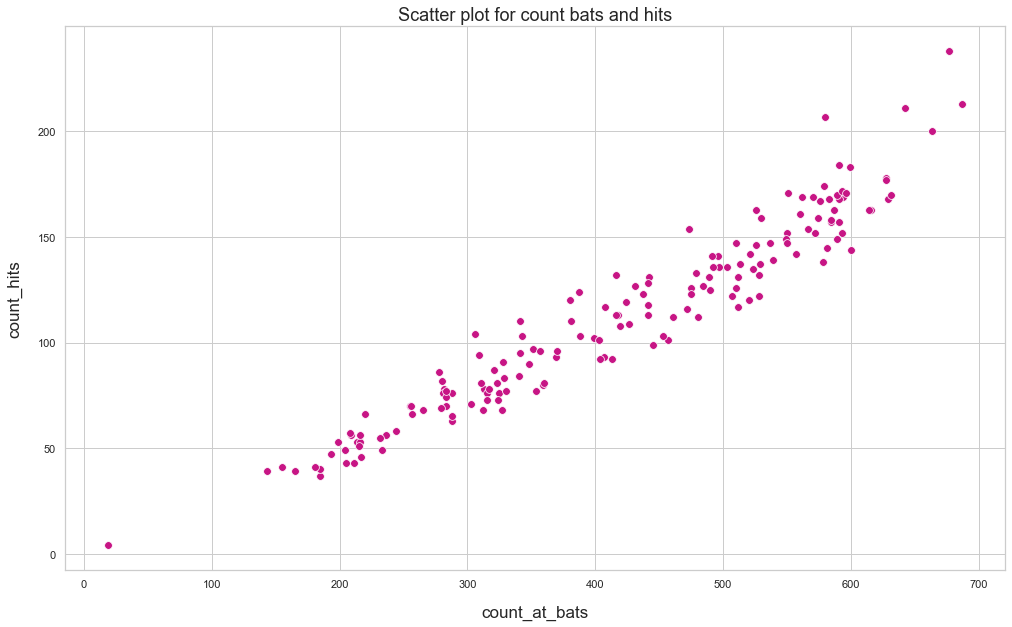

In [270]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
#sns.set(palette='Blues')

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);

sns.scatterplot(x = 'count_at_bats', y = 'count_hits', data = df , s=60, color="mediumvioletred")
plt.title("Scatter plot for count bats and hits", fontsize=18)

<h1>Lasso</h1>

In [250]:
df_s = df.copy() 
df_s['Salary'] = np.log(df_s['Salary'])

In [251]:
X = np.array(df_s.loc[:, df_s.columns != 'Salary'])
y = np.array(df_s.loc[:, df_s.columns == 'Salary'])


In [252]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=31)

In [253]:
#lasso = Lasso()
#lasso.fit(X_train,y_train)
#train_score=lasso.score(X_train,y_train)
#test_score=lasso.score(X_test,y_test)
#coeff_used = np.sum(lasso.coef_!=0)

#print("training score:", train_score) 
#print("test score:", test_score)
#print("number of features used: ", coeff_used)

In [254]:
#lasso001 = Lasso(alpha=0.01, max_iter=10e5)
#lasso001.fit(X_train,y_train)

In [255]:
#train_score001=lasso001.score(X_train,y_train)
#test_score001=lasso001.score(X_test,y_test)
#coeff_used001 = np.sum(lasso001.coef_!=0)

#print("training score for alpha=0.01:", train_score001) 
#print("test score for alpha =0.01: ", test_score001)
#print("number of features used: for alpha =0.01:", coeff_used001)

In [256]:
#lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
#lasso00001.fit(X_train,y_train)

In [257]:
#train_score00001=lasso00001.score(X_train,y_train)
#test_score00001=lasso00001.score(X_test,y_test)
#coeff_used00001 = np.sum(lasso00001.coef_!=0)

#print("training score for alpha=0.0001:", train_score00001) 
#print("test score for alpha =0.0001: ", test_score00001)
#print("number of features used: for alpha =0.0001:", coeff_used00001)

In [258]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

y_pred=lr.predict(X_test)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)


LR training score: 0.6388218154601881
LR test score:  0.5130180433454575


Text(0.5, 1.0, 'Scatter plot for lasso coefficient index vs magnitude')

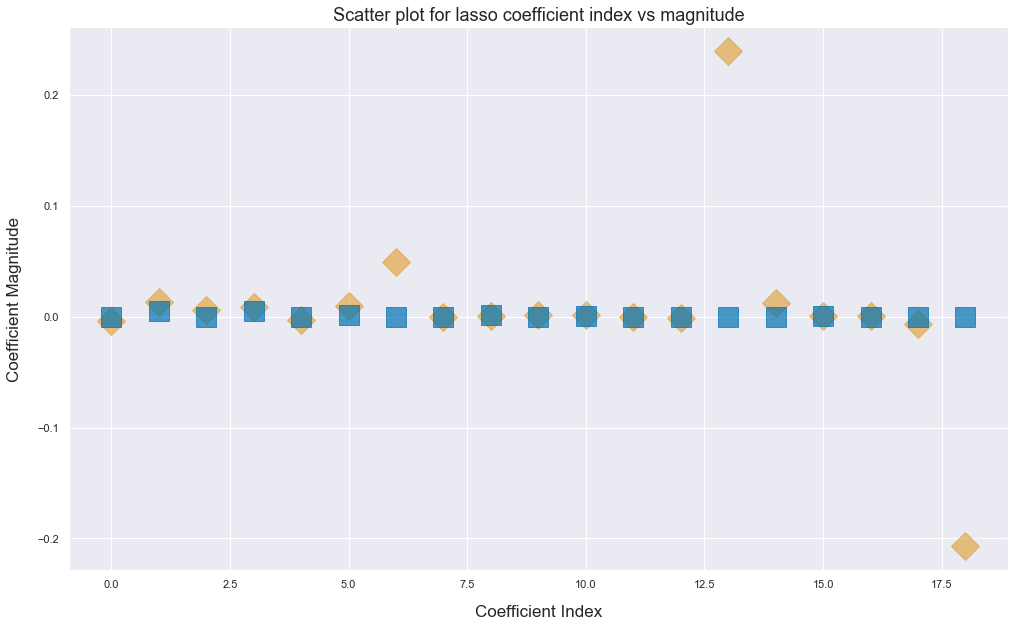

In [259]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
sns.set(palette='colorblind')

plt.xlabel("Coefficient Index", labelpad = 15, fontsize=17)
plt.ylabel("Coefficient Magnitude", labelpad = 15, fontsize=17);

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='s',markersize=20, label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='D',markersize=20, label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

#sns.scatterplot(x = 'count_at_bats', y = 'count_hits', data = df , s=60, color="mediumvioletred")
plt.title("Scatter plot for lasso coefficient index vs magnitude", fontsize=18)


In [260]:
#Print the intercept
print('Intercept:', float(lr.intercept_))

Intercept: 13.577428438263093


In [261]:
print((pd.DataFrame(y_pred, columns={'y_prediction'}).head(5)))
print()

   y_prediction
0     13.165151
1     13.688147
2     12.641639
3     13.724896
4     12.453852



In [265]:
def lasso_regression(X_train,y_train,alpha, i):
    #Fit the model
    lassoreg = Lasso(alpha=alpha, normalize=True,max_iter=1e6)
    lassoreg.fit(X_train,y_train['Salary'])
    y_pred = lassoreg.predict(X_train)
    global X;
    #mse = mean_squared_error(y_train,y_pred)
    #rss = mse*len(X_train)
    rss = sum((y_pred-y_train['Salary'])**2)
    print("rss ->",rss)
    aic = len(X_train)*np.log(rss/len(X_train)) + 2*(len(X_train.columns)-1)
    #aic = len(X_train)* np.log(mse) + (2 * (len(X_train)-1))
    #est_sal_off = salary_val(np.sqrt(mse))

    ret = [rss]
    ret.extend([aic])
    #ret.extend([est_sal_off])
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    print("ret->", ret)
    return ret

In [266]:
alpha_lasso = [1e-15, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, .5e-1, 1, 5, 20]
col = ['rss','aic','intercept'] + ['coef_x_%d'%i for i in range(1,20)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]

print("coll", col)
print("ind",ind)
print ("data -> ", len(X_train[0]))
print("y_train -> ", len(y_train[0]))

data_lasso  = pd.DataFrame(X_train)
data_lasso.columns = ['count_at_bats', 'count_hits', 'count_home_runs',	'count_runs', 'RBI', 'count_walks', 'years_experience', 'cumulative_at_bats', 'cumulative_hits', 'cumulative_home_runs', 'cumulative_runs', 'cumulative_RBI', 'cumulative_walks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague']
print(data_lasso.shape)

predict_lasso = pd.DataFrame(y_train)
predict_lasso.columns = ['Salary']

coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)
#for i in range(10):
#    coef_matrix_lasso.iloc[i,] = lasso_regression(X_train,y_train, alpha_lasso[i], i)

for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data_lasso,predict_lasso, alpha_lasso[i], i)
    


coll ['rss', 'aic', 'intercept', 'coef_x_1', 'coef_x_2', 'coef_x_3', 'coef_x_4', 'coef_x_5', 'coef_x_6', 'coef_x_7', 'coef_x_8', 'coef_x_9', 'coef_x_10', 'coef_x_11', 'coef_x_12', 'coef_x_13', 'coef_x_14', 'coef_x_15', 'coef_x_16', 'coef_x_17', 'coef_x_18', 'coef_x_19']
ind ['alpha_1e-15', 'alpha_1e-06', 'alpha_1e-05', 'alpha_0.0001', 'alpha_0.001', 'alpha_0.01', 'alpha_0.05', 'alpha_1', 'alpha_5', 'alpha_20']
data ->  19
y_train ->  1
(116, 19)
rss -> 35.34523750552361
ret-> [35.34523750552361, -101.85747769695826, 13.577428438261228, -0.003651445936360682, 0.012972438513826666, 0.004096909451254816, 0.008095376267354555, -0.0021185371611920833, 0.010355137002284546, 0.05481924386597673, -0.0001760356657658848, 0.0008717412172653974, 0.0022565342470706354, 0.0012941211123149421, -0.00043402704794336507, -0.0015672691406426675, 0.6198502520803821, 0.03385783177045286, 0.0003528383904618368, 0.0005589879536488534, -0.010100069770430374, -0.5850735847530987]
rss -> 35.345255610139354
ret

In [262]:
#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE) = %.2f" % mean_squared_error(y_test, y_pred))


Mean Squared Error (MSE) = 0.35


In [263]:
print(" Root Mean Squared Error (RMSE):%.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

 Root Mean Squared Error (RMSE):0.59


In [264]:
# Explained variance score:
print('Variance Score (R-Square) = %.2f' % r2_score(y_test, y_pred))

Variance Score (R-Square) = 0.51


<h1>Observation</h1>
<p><i> - We perfomed liner regression for all values of alpha and we can see that more coefficient become zero as the value of alpha increses.</i></p>
- <i>Lasso regression performes feature selection for small values of alpha and reduices the coefficients to zero such as, count_hits, count_runs, cumulative_hits and putouts.</i>